In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('C:\Program Files\Python36\Crime_Sample.txt')

In [3]:
df['Date'] = pd.to_datetime(df.Date)

In [4]:
df['Day']  = df.Date.dt.day

In [5]:
df['Time']  = df.Date.dt.time

In [6]:
# Primary Type - Nature of crime, Location Description

In [7]:
subset = df[['Day','Time','District','Primary Type','Location Description']]

In [8]:
subset.rename(columns = {'Primary Type':'Primary_Type'},inplace=True)

C:\Users\dell 7548\Anaconda3\lib\site-packages\pandas\core\frame.py:2844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [9]:
subset.rename(columns = {'Location Description':'Location_Description'},inplace=True)

C:\Users\dell 7548\Anaconda3\lib\site-packages\pandas\core\frame.py:2844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [10]:
subset.head()

,Day,Time,District,Primary_Type,Location_Description
0,1,01:00:00,18,BATTERY,BAR OR TAVERN
1,1,01:23:00,6,PUBLIC PEACE VIOLATION,SIDEWALK
2,1,00:01:00,3,CRIMINAL DAMAGE,RESIDENCE
3,1,01:00:00,10,BATTERY,STREET
4,1,01:45:00,19,CRIMINAL DAMAGE,RESIDENCE PORCH/HALLWAY


In [11]:
grouped = subset.groupby(['Day','Time','Primary_Type','Location_Description']).District.count()
grouped

Day  Time      Primary_Type         Location_Description          
1    00:00:00  BATTERY              APARTMENT                         2
               CRIM SEXUAL ASSAULT  RESIDENCE                         1
               CRIMINAL DAMAGE      ALLEY                             1
                                    HOSPITAL BUILDING/GROUNDS         1
                                    RESIDENCE                         1
                                    RESIDENCE-GARAGE                  1
                                    STREET                            1
               OTHER OFFENSE        STREET                            1
               THEFT                BAR OR TAVERN                     1
                                    STREET                            1
                                    VEHICLE NON-COMMERCIAL            1
     00:01:00  CRIM SEXUAL ASSAULT  OTHER                             1
               CRIMINAL DAMAGE      ALLEY                            

In [12]:
group_byloc = subset.groupby(['Location_Description']).District.count()

In [13]:
group_byloc

Location_Description
ABANDONED BUILDING                                   3
AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA      2
AIRPORT PARKING LOT                                  2
AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA       1
AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA       1
AIRPORT TERMINAL UPPER LEVEL - SECURE AREA           3
AIRPORT VENDING ESTABLISHMENT                        1
ALLEY                                              104
ANIMAL HOSPITAL                                      1
APARTMENT                                          387
APPLIANCE STORE                                      1
ATHLETIC CLUB                                       15
ATM (AUTOMATIC TELLER MACHINE)                       1
AUTO                                                62
BANK                                                 7
BAR OR TAVERN                                       32
BARBERSHOP                                           4
CAR WASH                                    

In [14]:
group_byloc.max()

889

In [15]:
group_byloc.mean()

31.904255319148938

In [16]:
group_by_primtype = subset.groupby(['Primary_Type']).District.count()

In [17]:
group_by_primtype

Primary_Type
ARSON                                  5
ASSAULT                              175
BATTERY                              537
BURGLARY                             108
CONCEALED CARRY LICENSE VIOLATION      4
CRIM SEXUAL ASSAULT                   12
CRIMINAL DAMAGE                      320
CRIMINAL TRESPASS                     72
DECEPTIVE PRACTICE                   115
HOMICIDE                             497
INTERFERENCE WITH PUBLIC OFFICER       8
INTIMIDATION                           1
KIDNAPPING                             1
MOTOR VEHICLE THEFT                  137
NARCOTICS                             96
OFFENSE INVOLVING CHILDREN            13
OTHER OFFENSE                        166
PROSTITUTION                           2
PUBLIC PEACE VIOLATION                14
ROBBERY                              146
SEX OFFENSE                            6
STALKING                               2
THEFT                                528
WEAPONS VIOLATION                     35
Nam

In [18]:
group_by_timeofday = subset.groupby(['Day','Time']).District.count()

In [19]:
group_by_timeofday

Day  Time    
1    00:00:00    12
     00:01:00    13
     00:04:00     1
     00:05:00     6
     00:10:00     3
     00:13:00     1
     00:15:00     3
     00:18:00     1
     00:20:00     1
     00:22:00     1
     00:24:00     1
     00:30:00     7
     00:35:00     2
     00:36:00     1
     00:38:00     1
     00:40:00     1
     00:41:00     3
     00:42:00     1
     00:45:00     2
     00:48:00     1
     00:50:00     3
     00:51:00     1
     00:55:00     1
     00:57:00     1
     01:00:00    25
     01:04:00     1
     01:05:00     1
     01:06:00     1
     01:10:00     4
     01:13:00     1
                 ..
29   21:49:00     1
     23:17:00     1
     23:30:00     1
30   00:52:00     1
     03:40:00     1
     03:54:00     1
     03:58:00     1
     04:32:00     1
     08:12:00     1
     10:51:00     1
     12:27:00     1
     14:25:00     1
     15:25:00     1
     16:32:00     3
     16:53:00     1
     20:07:00     1
     20:54:00     1
     21:22:00     1
     2

In [20]:
group_by_timeofday.max()

25

In [21]:
subset.columns

Index(['Day', 'Time', 'District', 'Primary_Type', 'Location_Description'], dtype='object')

In [22]:
subset.Location_Description.describe()

count       2999
unique        94
top       STREET
freq         889
Name: Location_Description, dtype: object

In [23]:
subset.Primary_Type.describe()

count        3000
unique         24
top       BATTERY
freq          537
Name: Primary_Type, dtype: object

In [24]:
subset.Time.describe()

count         3000
unique         883
top       12:00:00
freq            51
Name: Time, dtype: object

In [25]:
#Insights:
#1.Most crimes happen at STREET (889).Average no of crimes is 32
#2.Most common form of crime is BATTERY(537)
#3 Most of the crimes happen at 12:00(51)

In [26]:
subset.Time.value_counts()

12:00:00    51
01:00:00    45
16:00:00    44
18:00:00    42
17:00:00    40
20:00:00    37
15:00:00    36
02:00:00    35
19:00:00    35
13:00:00    33
21:00:00    33
14:00:00    30
11:00:00    30
03:00:00    30
13:30:00    30
08:00:00    29
22:00:00    28
09:00:00    28
10:00:00    27
14:30:00    24
12:30:00    24
07:00:00    24
04:00:00    24
23:00:00    23
23:30:00    22
00:01:00    22
11:30:00    21
00:00:00    21
06:00:00    20
20:30:00    20
            ..
06:24:00     1
18:32:00     1
17:21:00     1
02:36:00     1
06:39:00     1
15:27:00     1
19:04:00     1
15:09:00     1
19:37:00     1
00:14:00     1
13:04:00     1
05:41:00     1
13:18:00     1
12:59:00     1
00:22:00     1
23:42:00     1
20:09:00     1
03:53:00     1
22:02:00     1
01:26:00     1
13:23:00     1
16:28:00     1
22:27:00     1
18:13:00     1
21:34:00     1
21:47:00     1
02:01:00     1
08:48:00     1
15:46:00     1
08:34:00     1
Name: Time, Length: 883, dtype: int64

In [27]:
subset.Location_Description.value_counts()

STREET                                            889
RESIDENCE                                         440
APARTMENT                                         387
SIDEWALK                                          172
ALLEY                                             104
OTHER                                              88
PARKING LOT/GARAGE(NON.RESID.)                     84
RESTAURANT                                         67
AUTO                                               62
GAS STATION                                        53
SMALL RETAIL STORE                                 53
RESIDENCE-GARAGE                                   50
RESIDENTIAL YARD (FRONT/BACK)                      45
RESIDENCE PORCH/HALLWAY                            35
DEPARTMENT STORE                                   35
VEHICLE NON-COMMERCIAL                             34
BAR OR TAVERN                                      32
GROCERY FOOD STORE                                 27
HOTEL/MOTEL                 

In [28]:
subset.Primary_Type.value_counts()

BATTERY                              537
THEFT                                528
HOMICIDE                             497
CRIMINAL DAMAGE                      320
ASSAULT                              175
OTHER OFFENSE                        166
ROBBERY                              146
MOTOR VEHICLE THEFT                  137
DECEPTIVE PRACTICE                   115
BURGLARY                             108
NARCOTICS                             96
CRIMINAL TRESPASS                     72
WEAPONS VIOLATION                     35
PUBLIC PEACE VIOLATION                14
OFFENSE INVOLVING CHILDREN            13
CRIM SEXUAL ASSAULT                   12
INTERFERENCE WITH PUBLIC OFFICER       8
SEX OFFENSE                            6
ARSON                                  5
CONCEALED CARRY LICENSE VIOLATION      4
STALKING                               2
PROSTITUTION                           2
INTIMIDATION                           1
KIDNAPPING                             1
Name: Primary_Ty

In [29]:
%matplotlib inline

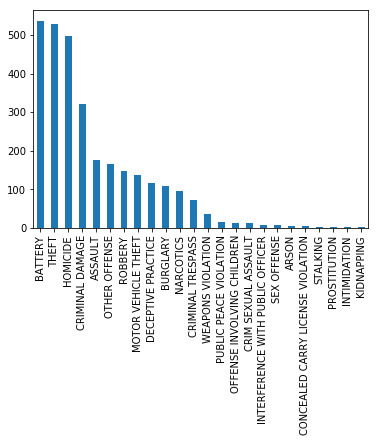

In [30]:
subset.Primary_Type.value_counts().plot(kind='bar')